In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset_train = pd.read_csv(r'C:\Users\Vrushab\Personal\Google_Stock_Price_Train.csv')

In [3]:
dataset_train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [4]:
trainset = dataset_train.iloc[:,1:2].values
trainset

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [5]:
# for normalizing the data between 0 = mean and Standard_deviation = 1 where the the data is uniformly distributed [bell shaped]

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_scaled = sc.fit_transform(trainset)

In [6]:
x_train = []
y_train = []

for i in range(60,1259):
    x_train.append(training_scaled[i-60:i, 0])
    y_train.append(training_scaled[0])
x_train,y_train = np.array(x_train),np.array(y_train)

In [7]:
x_train.shape

(1199, 60)

In [8]:
y_train.shape

(1199, 1)

In [9]:
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))

In [10]:
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout

In [11]:
regressor = Sequential()
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [12]:
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

In [13]:
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

In [14]:
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

In [15]:
regressor.add(Dense(units=1))

In [16]:
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [17]:
regressor.fit(x_train,y_train,epochs=100,batch_size=52)

Epoch 1/100
24/24 [==============================] - 11s 109ms/step - loss: 0.0012
Epoch 2/100
24/24 [==============================] - 3s 105ms/step - loss: 9.2111e-05
Epoch 3/100
24/24 [==============================] - 3s 104ms/step - loss: 5.6864e-05
Epoch 4/100
24/24 [==============================] - 3s 111ms/step - loss: 5.1751e-05
Epoch 5/100
24/24 [==============================] - 3s 114ms/step - loss: 4.5823e-05
Epoch 6/100
24/24 [==============================] - 3s 113ms/step - loss: 4.5602e-05
Epoch 7/100
24/24 [==============================] - 3s 113ms/step - loss: 3.7210e-05
Epoch 8/100
24/24 [==============================] - 3s 111ms/step - loss: 3.5101e-05
Epoch 9/100
24/24 [==============================] - 3s 114ms/step - loss: 3.9486e-05
Epoch 10/100
24/24 [==============================] - 3s 113ms/step - loss: 3.4146e-05
Epoch 11/100
24/24 [==============================] - 3s 112ms/step - loss: 3.2536e-05
Epoch 12/100
24/24 [==============================] - 3

24/24 [==============================] - 3s 112ms/step - loss: 4.8082e-07
Epoch 96/100
24/24 [==============================] - 3s 113ms/step - loss: 5.0167e-07
Epoch 97/100
24/24 [==============================] - 3s 112ms/step - loss: 4.2052e-07
Epoch 98/100
24/24 [==============================] - 3s 106ms/step - loss: 4.3341e-07
Epoch 99/100
24/24 [==============================] - 3s 106ms/step - loss: 4.5728e-07
Epoch 100/100
24/24 [==============================] - 3s 106ms/step - loss: 4.0388e-07


In [18]:
dataset_test = pd.read_csv(r'C:\Users\Vrushab\Personal\Google_Stock_Price_Test.csv')

In [19]:
(dataset_test)

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


In [20]:
real_stock_price = (dataset_test.iloc[:,1:2].values)

In [21]:
real_stock_price.shape

(20, 1)

In [22]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']),axis=0)

In [23]:
dataset_total

0     325.25
1     331.27
2     329.83
3     328.34
4     322.04
       ...  
15    829.62
16    837.81
17    834.71
18    814.66
19    796.86
Name: Open, Length: 1278, dtype: float64

In [24]:
inputs = dataset_total[len(dataset_total) - len(dataset_test)-60:].values

In [25]:
inputs = inputs.reshape(-1,1)
inputs

array([[779.  ],
       [779.66],
       [777.71],
       [786.66],
       [783.76],
       [781.22],
       [781.65],
       [779.8 ],
       [787.85],
       [798.24],
       [803.3 ],
       [795.  ],
       [804.9 ],
       [816.68],
       [806.34],
       [801.  ],
       [808.35],
       [795.47],
       [782.89],
       [778.2 ],
       [767.25],
       [750.66],
       [774.5 ],
       [783.4 ],
       [779.94],
       [791.17],
       [756.54],
       [755.6 ],
       [746.97],
       [755.2 ],
       [766.92],
       [771.37],
       [762.61],
       [772.63],
       [767.73],
       [764.26],
       [760.  ],
       [771.53],
       [770.07],
       [757.44],
       [744.59],
       [757.71],
       [764.73],
       [761.  ],
       [772.48],
       [780.  ],
       [785.04],
       [793.9 ],
       [797.4 ],
       [797.34],
       [800.4 ],
       [790.22],
       [796.76],
       [795.84],
       [792.36],
       [790.9 ],
       [790.68],
       [793.7 ],
       [783.33

In [26]:
inputs = sc.transform(inputs)
inputs.shape

(80, 1)

In [27]:
x_test = []
for i in range(60,80):
    x_test.append(inputs[i-60:i, 0])

In [28]:
x_test = np.array(x_test)
x_test.shape


(20, 60)

In [29]:
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(20, 60, 1)

In [30]:
dataset_test.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume     object
dtype: object

In [31]:
predicted_prices = regressor.predict(x_test)
predicted_prices = sc.inverse_transform(predicted_prices)

1/1 [==============================] - 2s 2s/step


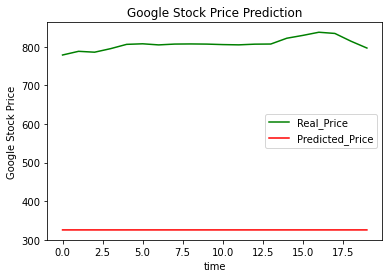

In [32]:
plt.plot(real_stock_price, color='green',label='Real_Price')
plt.plot(predicted_prices, color='red', label='Predicted_Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [43]:
from sklearn.preprocessing import OneHotEncoder

In [63]:
dataset_test['Open']= dataset_test['Open'].astype('category')
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [66]:
dataset_test['Close']= dataset_test['Close'].astype('category')
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [71]:
input1 = dataset_test['Open'].reshape(-1,1)
input1

AttributeError: 'Series' object has no attribute 'reshape'

In [67]:
ohe = OneHotEncoder()

In [70]:
value = ohe.fit_transform(dataset_test['Open'],dataset_test['Close'])

ValueError: Expected 2D array, got 1D array instead:
array=[778.81 788.36 786.08 795.26 806.4  807.86 805.   807.14 807.48 807.08
 805.81 805.12 806.91 807.25 822.3  829.62 837.81 834.71 814.66 796.86].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.